In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.options.display.float_format = "{:.2f}".format

In [2]:
# Read case data
df = pd.read_excel("4. Case 3 - Two-sample t-test.xlsx")

In [3]:
df.head()

,Store Id,Display Type,Sales Volume
0,3846186,Old_display_type,2038.31
1,1083410,Old_display_type,2017.29
2,4278951,Old_display_type,1746.47
3,6670048,Old_display_type,2061.78
4,5054220,Old_display_type,2253.76


In [4]:
# Create arrays with units sold for 'Old_display_type' and 'New_display_type'
data_o = df[df["Display Type"] =="Old_display_type"]["Sales Volume"].values
data_n = df[df["Display Type"] =="New_display_type"]["Sales Volume"].values

Let's determine whether the variables in our dataset are normally distributed. We'll use the scipy.stats.shapiro function from the SciPy library for this purpose. This function conducts the Shapiro-Wilk test for normality—a statistical hypothesis test that assesses whether a sample comes from a normally distributed population.

Parameters:

- x: A one-dimensional array or list that contains the data to be tested


Returns:

- W: The test statistic (float)
- p-value: The p-value (float) for the hypothesis test


Null Hypothesis (H0): The sample is from a normally distributed population.

Alternative Hypothesis (H1): The sample is not drawn from a normally distributed population.

We fail to reject the null hypothesis if the p-value is greater than the significance level. In this scenario, we may infer that the data are normally distributed.

If the p-value is smaller than the significance level, we reject the null hypothesis and conclude that the sample comes from a non-normally distributed population.

For the subsequent tests, we’ll utilize a significance level of 0.05.

In [5]:
# Perform Shapiro-Wilk test on both variables
print("Old display: " + str(shapiro(data_o)))
print("New display: " + str(shapiro(data_n)))

Old display: ShapiroResult(statistic=0.9745520409829699, pvalue=0.3508105210464765)
New display: ShapiroResult(statistic=0.9707473113019827, pvalue=0.24816190928829607)


Since both p-values exceed alpha, we do not reject the null hypothesis. We deduce that the sales volume data for both groups are normally distributed at the 0.05 significance level.

Next, examine the related Q-Q plots to see if they lead us to the same conclusion.

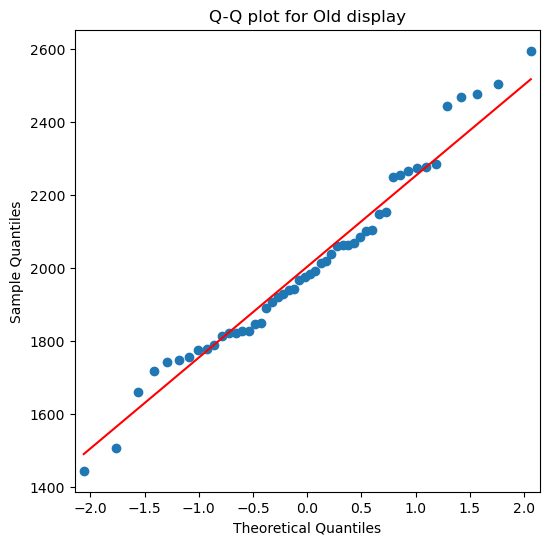

In [6]:
# Create Q-Q plot for the variable "Old display"
fig, ax = plt.subplots(figsize=(6,6))
sm.qqplot(data_o, line='s', ax=ax, fmt='b')

# Set the chart title and axis labels
ax.set_title("Q-Q plot for Old display")

# Display the chart
plt.show()

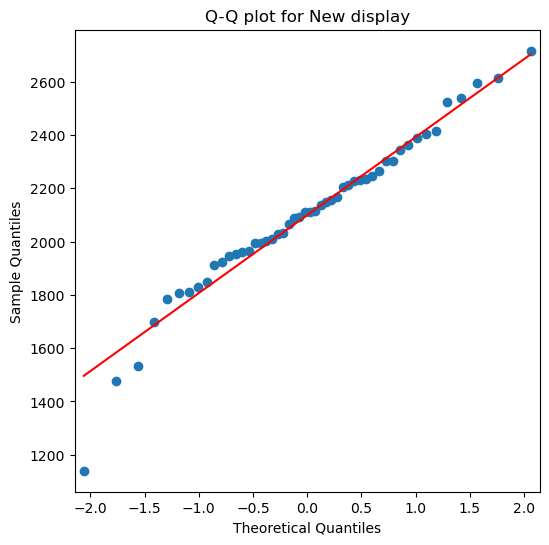

In [7]:
# Create Q-Q plot for the variable "New display"
fig, ax = plt.subplots(figsize=(6,6))
sm.qqplot(data_n, line='s', ax=ax, fmt='b')

# Set the chart title and axis labels
ax.set_title("Q-Q plot for New display")

# Display the chart
plt.show()

Since the points on the Q-Q plots align closely with straight lines, it indicates that the data in both cases are normally distributed. This observation aligns with the findings from the Shapiro-Wilk test.